In [2]:
import pandas
import numpy
import textiles.threads as threads
import seaborn
# import textiles.threads.outliers as outliers
from textiles.dataframes import textiles
from prettytable import PrettyTable, ALL
from matplotlib import pyplot
from scipy.cluster.hierarchy import linkage, dendrogram

In [3]:

########################################################################################################################

table = PrettyTable()
table.hrules = ALL
table.field_names = ['ПАРАМЕТР', 'ЗНАЧЕНИЕ']
table.add_row(["Минимальное значение толщины по основе", threads.warp_min])
table.add_row(["Максимальное значение толщины по основе", threads.warp_max])
table.add_row(["Разброс значение по основе", threads.warp_range])
table.add_row(["Разброс значений по утку", threads.weft_range])
table.add_row(["Среднее значение по основе", threads.warp_mean])
table.add_row(["Среднее значение ро утку", threads.weft_mean])
table.add_row(["Мода толщины по основе", threads.warp_mode])
table.add_row(["Мода толщины по утку", threads.weft_mode])
table.add_row(["Медиана толщины по основе", threads.warp_median])
table.add_row(["Медиана толщины по утку", threads.weft_median])
print(table)

########################################################################################################################


+-----------------------------------------+----------+
|                 ПАРАМЕТР                | ЗНАЧЕНИЕ |
+-----------------------------------------+----------+
|  Минимальное значение толщины по основе |   0.2    |
+-----------------------------------------+----------+
| Максимальное значение толщины по основе |   1.15   |
+-----------------------------------------+----------+
|        Разброс значение по основе       |   0.95   |
+-----------------------------------------+----------+
|         Разброс значений по утку        |   4.15   |
+-----------------------------------------+----------+
|        Среднее значение по основе       |  0.471   |
+-----------------------------------------+----------+
|         Среднее значение ро утку        |   0.53   |
+-----------------------------------------+----------+
|          Мода толщины по основе         |   0.5    |
+-----------------------------------------+----------+
|           Мода толщины по утку          |   0.45   |
+---------

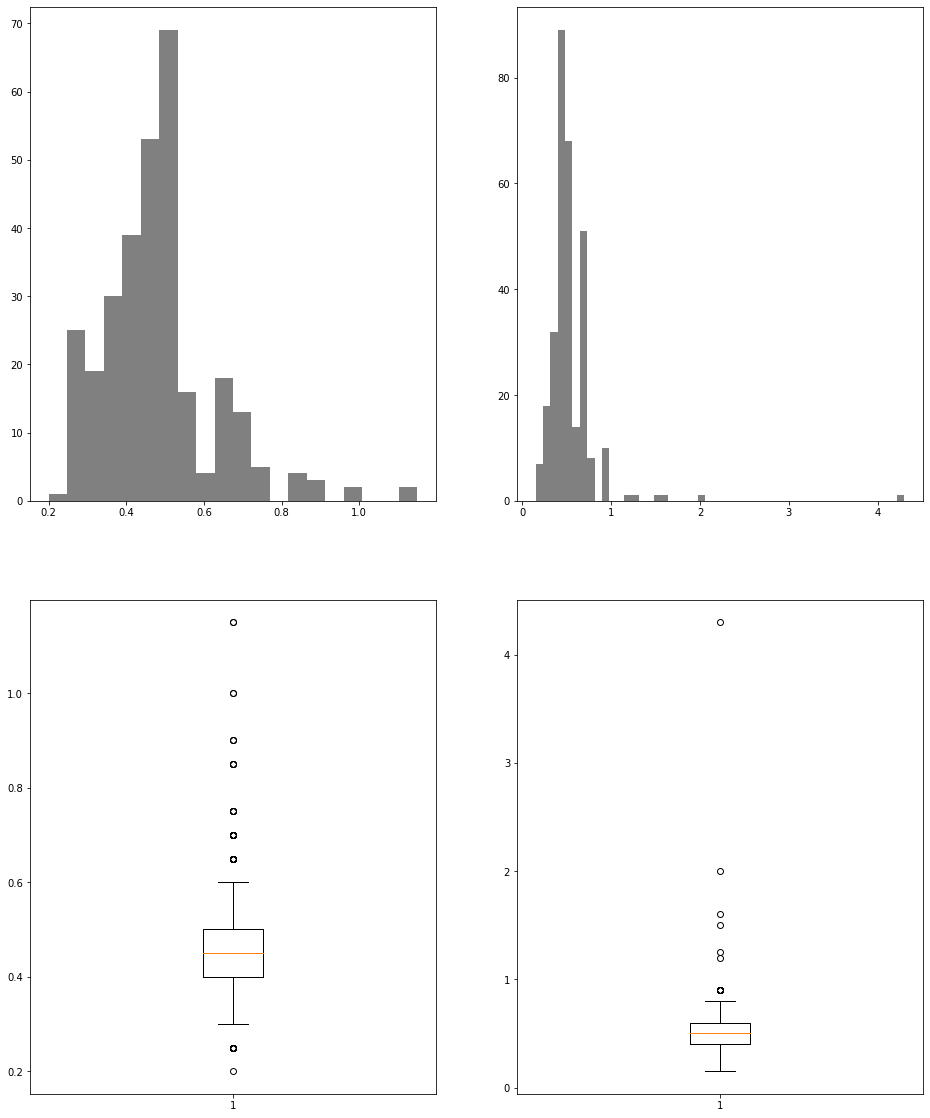

In [4]:
_, ax = pyplot.subplots(nrows=2, ncols=2, figsize=(16, 20))
ax[0][0].hist(threads.warps, bins=20, color='gray')
ax[0][1].hist(threads.wefts, bins=50, color='gray')
ax[1][0].boxplot(threads.warps)
ax[1][1].boxplot(threads.wefts)
# ax[2][0].bar(warps, warps_unique, color='gray')
# ax[2][0].hist2d(warps, wefts)
pyplot.show()

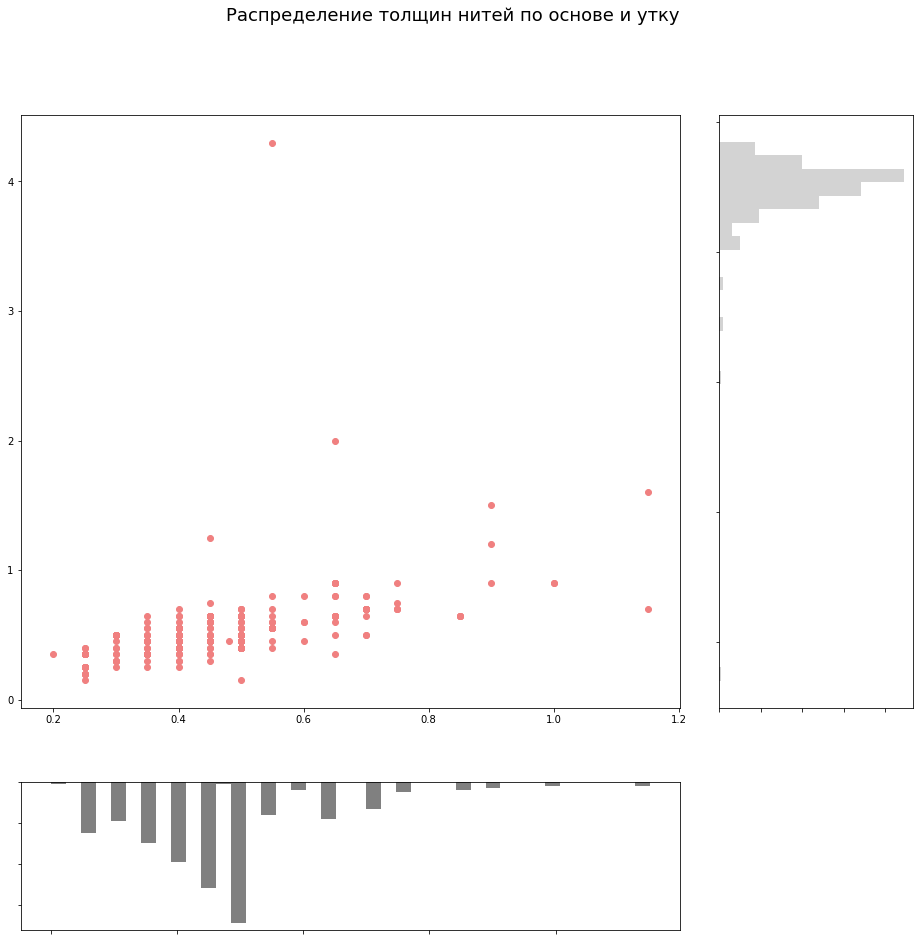

In [5]:
fig = pyplot.figure(figsize=(16, 15))
grid = pyplot.GridSpec(4, 4, hspace=0.5, wspace=0.2)

fig.suptitle('Распределение толщин нитей по основе и утку', fontsize=18)

ax_main = fig.add_subplot(grid[:-1, :-1])

ax_right = fig.add_subplot(grid[:-1, -1], xticklabels=[], yticklabels=[])
ax_right.invert_yaxis()

ax_bottom = fig.add_subplot(grid[-1, 0:-1], xticklabels=[], yticklabels=[])
ax_bottom.invert_yaxis()

ax_main.scatter(threads.warps, threads.wefts, color='lightcoral')
ax_bottom.hist(threads.warps, 40, color='gray', histtype='stepfilled', orientation='vertical')
ax_right.hist(threads.wefts, 40, color='lightgray', histtype='stepfilled', orientation='horizontal')

pyplot.show()

In [6]:
# Распределение по направлению крутки нити;

########################################################################################################################

warps_twist_s = textiles[textiles['twist_warp'] == 'S']
wefts_twist_s = textiles[textiles['twist_weft'] == 'S']

########################################################################################################################

warps_twist_z = textiles[textiles['twist_warp'] == 'Z']
wefts_twist_z = textiles[textiles['twist_weft'] == 'Z']

########################################################################################################################


In [7]:

########################################################################################################################

warps_angle_loose = textiles[textiles['angle_warp'] == 'loose']
warps_angle_medium = textiles[textiles['angle_warp'] == 'medium']
warps_angle_uneven = textiles[textiles['angle_warp'] == 'uneven']

########################################################################################################################

wefts_angle_loose = textiles[textiles['angle_weft'] == 'loose']
wefts_angle_medium = textiles[textiles['angle_weft'] == 'medium']
wefts_angle_uneven = textiles[textiles['angle_weft'] == 'uneven']

########################################################################################################################


In [8]:
table = PrettyTable()
table.hrules = ALL
table.field_names = ['ПАРАМЕТР', 'ЗНАЧЕНИЕ']
table.add_row(['ТКАНЕЙ СО СЛАБОЙ КРУТКОЙ ПО ОСНОВЕ', len(textiles_angle_warp_loose)])
table.add_row(['ТКАНЕЙ СО СРЕДНЕЙ КРУТКОЙ ПО ОСНОВЕ', len(textiles_angle_warp_medium)])
table.add_row(['ТКАНЕЙ', len(textiles_angle_warp_uneven)])
table.add_row(['ТКАНЕЙ СО СЛАБОЙ КРУТКОЙ ПО УТКУ', len(textiles_angle_weft_loose)])
table.add_row(['ТКАНЕЙ СО СРЕДНЕЙ КРУТКОЙ ПО УТКУ', len(textiles_angle_weft_medium)])
table.add_row(['ТКАНЕЙ', len(textiles_angle_weft_uneven)])
print(table)

NameError: name 'textiles_angle_warp_loose' is not defined

In [9]:
# Сравнение мер центральной тенденции

########################################################################################################################

print("Среднее значение толщины нити по основе для тканей со слабой круткой по основе - " +
      str(round(textiles_angle_warp_loose['warp_nominal'].mean(), 3)))
print("Среднее значение толщины нити по основе для тканей со средней круткой по основе - " +
      str(round(textiles_angle_warp_medium['warp_nominal'].mean(), 3)))
print("" + str(round(textiles_angle_warp_uneven['warp_nominal'].mean(), 3)))

########################################################################################################################

print("Среднее значение толщины нити по основе для тканей со слабой круткой по утку - " +
      str(round(textiles_angle_weft_loose['warp_nominal'].mean(), 3)))
print("" + str(round(textiles_angle_weft_medium['warp_nominal'].mean(), 3)))
print("" + str(round(textiles_angle_weft_uneven['warp_nominal'].mean(), 3)))

########################################################################################################################


NameError: name 'textiles_angle_warp_loose' is not defined

In [14]:

# Вычисление выбросов по толщине по основе (на основе межквартильного расстояния);

########################################################################################################################

warp_lower_border = round(threads.warps_q1 - 1.5 * (threads.warps_q3 - threads.warps_q1), 3)
warp_upper_border = round(threads.warps_q1 + 1.5 * (threads.warps_q3 - threads.warps_q1), 3)

########################################################################################################################

print("" + str(warp_lower_border))
print("" + str(warp_upper_border))

########################################################################################################################


0.25
0.55


In [ ]:

# Вычисление выбросов по толщине по утку (на основе межквартильного расстояния);

########################################################################################################################

weft_lower_border = round(weft_quartile_1 - 1.5 * (weft_quartile_3 - weft_quartile_1), 3)
weft_upper_border = round(weft_quartile_1 + 1.5 * (weft_quartile_3 - weft_quartile_1), 3)

########################################################################################################################

print("" + str(weft_lower_border))
print("" + str(weft_upper_border))

########################################################################################################################


In [ ]:

########################################################################################################################

warps_cleared = textiles.query('warp_nominal <= 0.55 and warp_nominal >= 0.25')

########################################################################################################################

wefts_cleared = textiles.query('weft_nominal >=0.1 and weft_nominal <= 0.7')

########################################################################################################################

warps_outliers_lower = textiles.query('warp_nominal < 0.25')
warps_outliers_upper = textiles.query('warp_nominal > 0.55')

########################################################################################################################

wefts_outliers_lower = textiles.query('weft_nominal < 0.1')
wefts_outliers_upper = textiles.query('weft_nominal > 0.7')

########################################################################################################################

warps_outliers = warps_outliers_lower.merge(warps_outliers_upper, how='outer')
wefts_outliers = wefts_outliers_lower.merge(wefts_outliers_upper, how='outer')
warps_outliers_percent = round((len(warps_outliers) / len(textiles)) * 100, 3)
wefts_outliers_percent = round((len(wefts_outliers) / len(textiles)) * 100, 3)
outliers_percent = round(((len(warps_outliers) + len(wefts_outliers))/ len(textiles)) * 100, 3)


In [13]:
table = PrettyTable()
table.hrules = ALL
table.field_names = ['ПАРАМЕТР', 'ЗНАЧЕНИЕ']
table.add_row(['Количество выбросов по основе', len(warps_outliers)])
table.add_row(['Количество выбросов по основе', len(wefts_outliers)])
table.add_row(['Процент выбросов по основе', warps_outliers_percent])
table.add_row(['Процент выбросов по утку', wefts_outliers_percent])
table.add_row(['Всего выбросов по толщине тканей', outliers_percent])
print(table)

NameError: name 'warps_outliers' is not defined

In [14]:
table = PrettyTable()
table.hrules = ALL
table.field_names = ["ПАРАМЕТР", "ЗНАЧЕНИЕ"]
table.add_row(["Данных без учёта выбросов по толщине основы", len(warps_cleared)])
table.add_row(["Данных без учёта выбросов по толщине утка", len(wefts_cleared)])
table.add_row(["Выбросов по толщине основы", len(warps_outliers_lower) + len(warps_outliers_upper)])
table.add_row(["Выбросов по толщине утка", ''])
print(table)

NameError: name 'warps_cleared' is not defined

NameError: name 'warp_quartile_1' is not defined

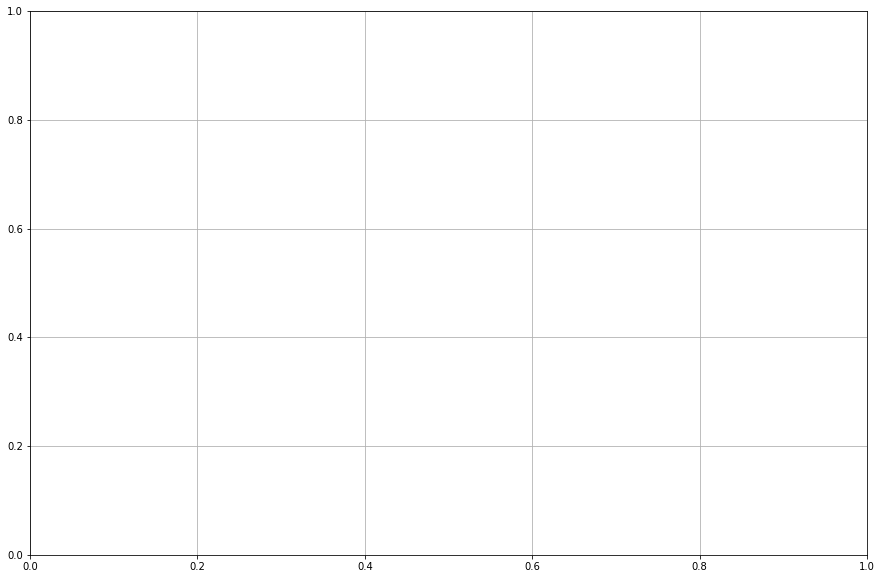

In [15]:

########################################################################################################################

fig = pyplot.figure(figsize=(15, 10))
ax = fig.add_subplot()
pyplot.grid()
pyplot.axvline(warp_quartile_1, color='green', label='Квартили')
pyplot.axvline(mean_warp, color='blue', label='Среднее значение толщинв по основе')
pyplot.axvline(warp_quartile_3, color='green', label='Квартили')
pyplot.axvline(warp_lower_border, color='red', label='Границы выбросов')
pyplot.axvline(warp_upper_border, color='red', label='Границы выбросов')
textiles.warp_nominal.hist(ax=ax, bins=20, color='lightgray', label='Толщины нитей по основе')
ax.set_title('Гистограмма распределения толщин нитей по основе', fontsize=18)
ax.set_xlabel('Толщина нити (мм)')
ax.set_ylabel('Накопленная вероятность')
ax.legend()
pyplot.show()

########################################################################################################################


AttributeError: module 'textiles.threads.threads' has no attribute 'weft_q1'

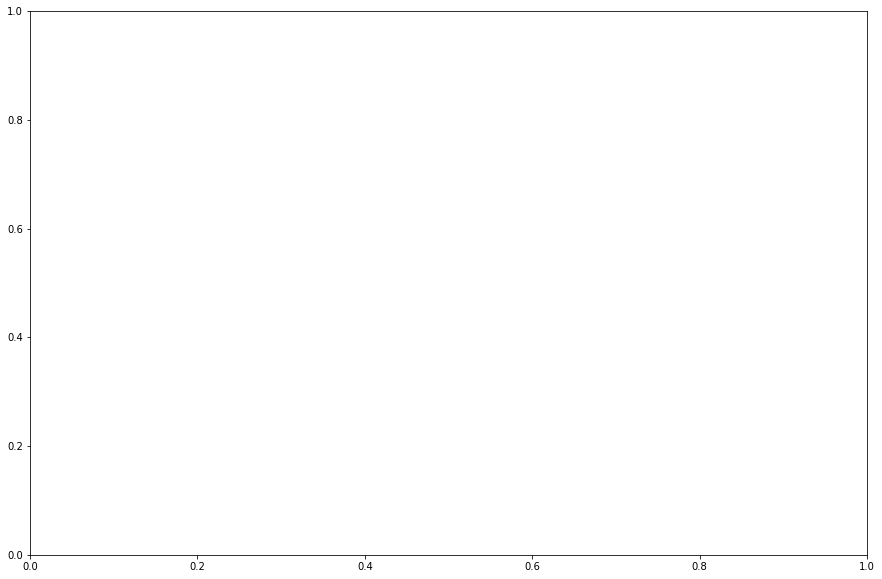

In [16]:

########################################################################################################################

fig, ax = pyplot.subplots(figsize=(15, 10))
pyplot.axvline(threads.weft_q1, color='green', label='Квартили')
pyplot.axvline(threads.weft_mean, color='blue', label='Среднее значение толщины по утку')
pyplot.axvline(threads.weft_median, color='violet', label='Медиана толщины по утку')
pyplot.axvline(threads.weft_q3, color='green', label='Квартили')
pyplot.axvline(weft_lower_border, color='red', label='Границы выбросов')
pyplot.axvline(weft_upper_border, color='red', label='Границы выбросов')
textiles.weft_nominal.hist(ax=ax, bins=50, color='lightgray', label='Толщины нитей по утку')
ax.set_title('Гистограмма распределения толщин нитей по утку', fontsize=18)
ax.set_xlabel('Толщина нити (мм)')
ax.set_ylabel('Накопленная вероятность')
ax.legend()
pyplot.show()

########################################################################################################################


In [ ]:

# График распределения толщин по основе;

########################################################################################################################

fig, ax = pyplot.subplots(figsize=(15, 10))
threads.warps_outliers_lower.warp_nominal.hist(ax=ax, color='lightcoral', label='Выбросы')
threads.warps_outliers_upper.warp_nominal.hist(ax=ax, color='violet', label='Выбросы')
threads.warps_cleared.warp_nominal.hist(ax=ax, color='lightgreen', label='Данные за исключением выбросов')
ax.set_title('Распределение толщины нитей по основе', fontsize=18)
ax.set_xlabel('Толщина нити (мм)')
ax.set_ylabel('Накопленная вероятность')
ax.legend()
pyplot.show()

########################################################################################################################


NameError: name 'wefts_outliers_lower' is not defined

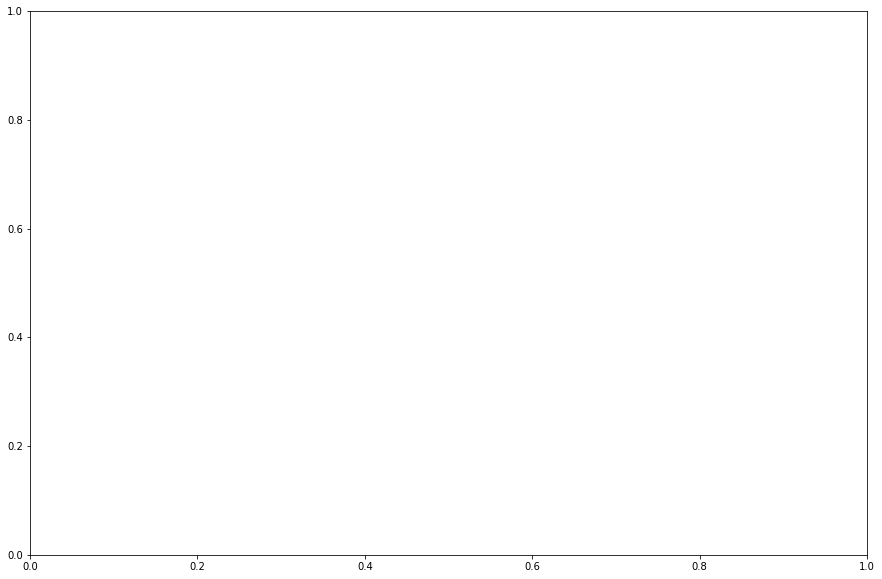

In [18]:

########################################################################################################################

fig, ax = pyplot.subplots(figsize=(15, 10))
wefts_outliers_lower.weft_nominal.hist(ax=ax, color='lightcoral', label='Выбросы')

# pyplot.hist(threads_outliers_weft_upper.weft_nominal, bins=14)
wefts_outliers_upper.weft_nominal.hist(ax=ax, bins=50, color='violet', label='Выбросы')
wefts_cleared.weft_nominal.hist(ax=ax, bins=10, color='lightgreen', label='Данные за исключением выбросов')
ax.set_title('Распределение толщины нитей по по утку', fontsize=18)
ax.set_xlabel('Толщина нити (мм)')
ax.set_ylabel('Накопленная вероятность')
ax.legend()
pyplot.show()

########################################################################################################################


In [ ]:
fig, ax = pyplot.subplots(figsize=(12, 12))
warps.plot.kde(color='lightgreen', label='1')
wefts.plot.kde(color='lightcoral', label='2')
ax.set_title('График функции оценки ядерной плотности толщин нитей по основе и по утку', fontsize=16)
ax.legend()

In [17]:
warps_list = textiles.warp_nominal.tolist()
wefts_list = textiles.weft_nominal.tolist()

warps_angles = textiles.angle_warp.to_list()
wefts_angles = textiles.angle_weft.to_list()

warps_wefts_list = []
for num, item in enumerate(warps_list):
    warps_wefts_list.append((warps_list[num], wefts_list[num]))

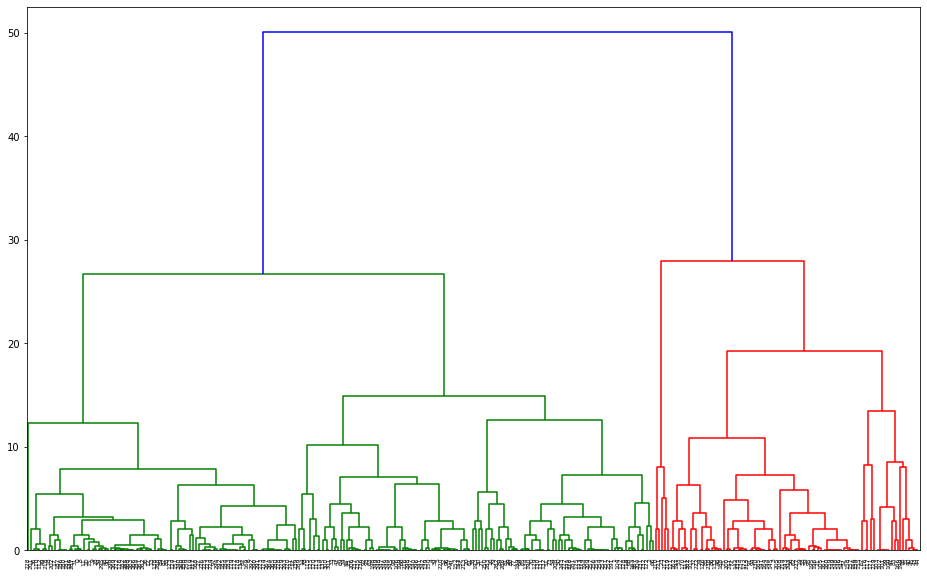

In [25]:
mergings = linkage(warps_wefts_list, method='complete')
fig, ax = pyplot.subplots(figsize=[16, 10])
dendrogram(mergings, leaf_rotation=90, leaf_font_size=6, ax=ax)
pyplot.show()

In [20]:

# Построение дендрограммы;

warps_list = textiles.warp_nominal.tolist()
wefts_list = textiles.weft_nominal.tolist()

warps_dens_list = textiles['warp_dens'].tolist()
wefts_dens_list = textiles['weft_dens'].tolist()

warps_wefts_list = []
for num, item in enumerate(warps_list):
    warps_wefts_list.append((warps_dens_list[num], wefts_dens_list[num], warps_list[num], wefts_list[num]))
# print(mergings)

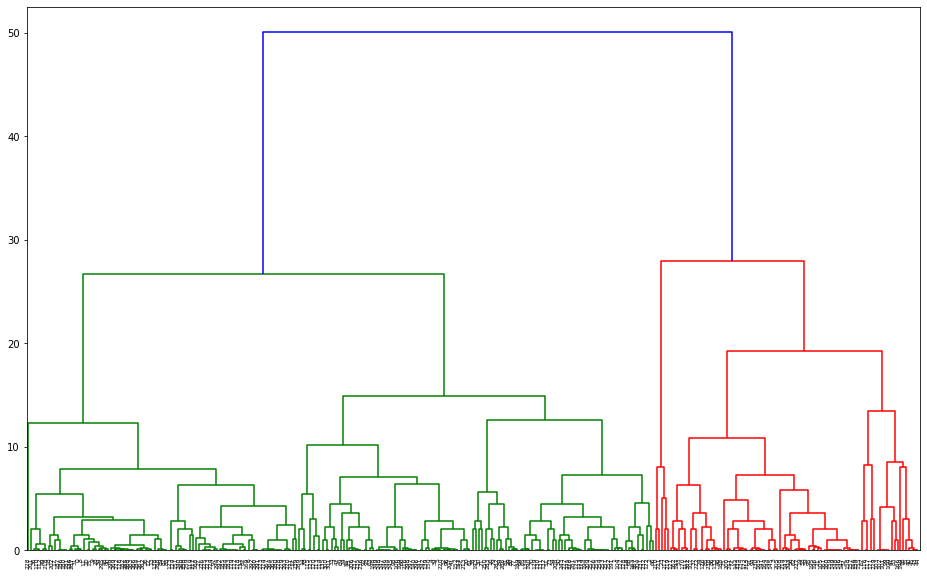

In [24]:
mergings = linkage(warps_wefts_list, method='complete')
fig, ax = pyplot.subplots(figsize=[16, 10])
dendrogram(mergings, leaf_rotation=90, leaf_font_size=6, ax=ax)
pyplot.show()

In [23]:
summary_table = PrettyTable()
summary_table.hrules = ALL
summary_table.field_names = ['ПАРАМЕТР', 'ПОЛНАЯ ВЫБОРКА', 'ВЫБОРКА (ЗА ИСКЛЮЧЕНИЕМ ВЫБРОСОВ)']
summary_table.add_row(['Среднее значение толщины по основе', threads.warp_mean, threads.cleared_warps_mean])
summary_table.add_row(['Медиана толщины по основе', threads.warp_median, threads.cleared_warps_median])
summary_table.add_row(['Мода толщины по основе', threads.warp_mode, threads.cleared_warps_mode])
# summary_table.add_row(['Q1', threads.warps_q1, threads.cleared_warps_q1])
# summary_table.add_row(['Q3', threads.warps_q3, threads.cleared_warps_q3])
summary_table.add_row(['Среднее значение толщины по утку', threads.weft_mean, threads.cleared_wefts_mean])
summary_table.add_row(['Размах толщин по основе', threads.warp_range, '',])
summary_table.add_row(['Размах толщин по утку', threads.weft_range, ''])
summary_table.add_row(['Межквартильный размах', '', ''])
print(summary_table)

+------------------------------------+----------------+-----------------------------------+
|              ПАРАМЕТР              | ПОЛНАЯ ВЫБОРКА | ВЫБОРКА (ЗА ИСКЛЮЧЕНИЕМ ВЫБРОСОВ) |
+------------------------------------+----------------+-----------------------------------+
| Среднее значение толщины по основе |     0.471      |               0.436               |
+------------------------------------+----------------+-----------------------------------+
|     Медиана толщины по основе      |      0.45      |                0.45               |
+------------------------------------+----------------+-----------------------------------+
|       Мода толщины по основе       |      0.5       |                0.5                |
+------------------------------------+----------------+-----------------------------------+
|  Среднее значение толщины по утку  |      0.53      |               0.464               |
+------------------------------------+----------------+-------------------------